# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Determinación-de-los-parámetros-de-los-polarizadores-lineales" data-toc-modified-id="Determinación-de-los-parámetros-de-los-polarizadores-lineales-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Determinación de los parámetros de los polarizadores lineales</a></div><div class="lev2 toc-item"><a href="#Tarjeta-de-adquisición-de-datos" data-toc-modified-id="Tarjeta-de-adquisición-de-datos-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Tarjeta de adquisición de datos</a></div><div class="lev2 toc-item"><a href="#Parametros-iniciales" data-toc-modified-id="Parametros-iniciales-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Parametros iniciales</a></div><div class="lev2 toc-item"><a href="#Motores" data-toc-modified-id="Motores-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Motores</a></div><div class="lev2 toc-item"><a href="#Rotación-de-P4---referencia-motor" data-toc-modified-id="Rotación-de-P4---referencia-motor-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Rotación de P4 - referencia motor</a></div><div class="lev2 toc-item"><a href="#Rotación-de-P4---referencia-polarizador" data-toc-modified-id="Rotación-de-P4---referencia-polarizador-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Rotación de P4 - referencia polarizador</a></div><div class="lev2 toc-item"><a href="#Final" data-toc-modified-id="Final-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Final</a></div>

# Determinación de los parámetros de los polarizadores lineales

**Autor**: Jesús del Hoyo

**Fecha**:   23/10/2018

**Objetivo**: Ecograb project, polariscope callibration

**Resumen**:

Este archivo debe servir para realizar una calibración completa del polarimetro. En primer lugar, se calibrarán los elementos en transmisión, introduciéndolos uno a uno. Una vez que el polarímetro esté completamente caracterizado en transmisión, opcionalmente podrán medirse el resto de elementos que se deben colocar en el camino del haz para trabajar en reflexión, como un espejo, un beam splitter o el objetivo de microscopio.

A continuación se describen los elementos de cada parte del polarímetro. Estos elementos pueden cambiar con el tiempo, pero el proceso de calibración es casi el mismo. La única excepción es en caso de que se incluya una fuente con longitud de onda variable. En ese caso, será necesaria una calibración para cada longitud de onda.

**Iluminación**:
1. Diodo láser de Roithner S85500MG de longitud de onda $\lambda$=850 nm.
1. Lente colimadora de Thorlabs DG10-600-B.
1. Polarizador LPNIRE100-B (P0)
1. Retardador WPQ10E-850-SP (R0)

**Brazo de referencia**
1. Beam sampler.
1. Lente ~20 cm de focal.
1. Photodiode PDA100A-EC de Thorlabs (PHD0)

**Generador de estados**:
1. Polarizador 1 LPNIRE100-B (P1).
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R1).

**Analizador de estados**
1. Retardador  2 $\lambda/4$ Thorlabs WPQ10E-850-SP (R2).
1. Polarizador 1 LPNIRE100-B (P2).

**Detector**
1. Dos lentes ~20 cm de focal.
1. Photodiode PDA100A-EC de Thorlabs (PHD1)

**Método de calibración**
La calibración se realiza siempre empezando con el número mínimo de elementos, y añadiéndolos poco a poco para reducir los errores cometidos. Se recomienda dejar calentar la fuente al menos 30 minutos para estabilizarla en temperatura.

1. Medir el nivel de 0 de ambos fotodiodos con el diodo apagado y sin ningún elemento óptico salvo las lentes y el beam splitter.
1. Encender el diodo y colocar P0. Ajustar su ángulo para que se transmita la mayor cantidad de señal posible (se recomienda usar un osciloscopio).
1. Colocar R0 y P2. Se ajusta su ángulo de tal manera que, al hacer un bucle de 360º con P2 se obtenga la menor diferencia entre máximo y mínimo.
1. Retirar P1. En estas condiciones medimos las señales de ambos fotodiodos para tener una medida clara de cuanta energía tenemos sin ningún elemento optico ni del analizador ni del generador de estados, y por supuesto, sin la muestra.
1. Colocar P1 (en la posición de P2) y el polarizador de eje conocido, y rotar P1. De esta manera podremos conocer su ángulo de origen.
1. Retirar el polarizador de eje conocido y colocar R1. Al hacer un bucle en R1 se puede conocer su ángulo de origen.
1. Realizar un doble bucle tanto en R1 como en P2. De esta manera se analiza la fuente de iluminación.
1. Retirar R1 y colocar P3 en la posición de P1.Hacer un bucle en P3.
1. Retirar P1 (que estaba en la posición de P2) y colocar ahí P2. Hacer un bucle en P2.
1. Retirar P3 (que estaba en la posición de P1) y colocar ahí P1. Hacer un bucle en P1.
1. Colocar R1 y hacer un doble bucle con P1 y P2.
1. Colocar R2 y hacer un doble bucle con R1 y R2 manteniendo los polarizadores paralelos.
1. Repetir con los polarizadores cruzados.
1. Análisis de datos. Partimos de una serie de parámetros parecidos a los reales, con ángulos de giro aleatorios, y una fuente de iluminación con elipticidad ligeramente aleatoria. Entonces, se van ajustando todos los experimentos, uno a uno. La bondad del ajuste final se determina por la medida de la matriz de Mueller del vacío, usando los datos del último experimento.
1. Este último paso se repite iterativamente, usando los parámetros finales de una iteración como los parámetros iniciales de la siguiente.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib widget

In [2]:
from __future__ import print_function, division

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time
import datetime
import pprint
from math import sqrt, pi

from scipy.io import savemat, loadmat
from scipy import optimize
from phyton_optics import degrees

import phyton_optics.polarization_jones as pj
import phyton_optics.polarization_stokes as ps
import phyton_optics.polarization_mueller_analysis as amm

from polarimeter.polarimeter import Intensity_Rotating_Elements
from polarimeter.data_process import process_calibration

import polarimeter.polarimeter as opsys
import numpy as np
import os

from polarimeter.utils import dibujar_2d_fitting, plot_2d, plot_experiment_residuals_1D

## Preparar los experimentos

### Tarjeta de adquisición de datos.

In [3]:
import u3
from polarimeter.daca import u3, LabJackPython, get_intensity, get_two_intensities, V, mV

In [4]:
# loads labjack
d=u3.U3()
data_callibration=d.getCalibrationData()
AIN_signal=1
AIN_ref=2

# print("\n Callibration data:")
# pprint.pprint(data_callibration)

## Check that daca is working
# 
# ain1bits, = d.getFeedback(u3.AIN(AIN_number)) # Read from raw bits from AIN0
# ainValue = d.binaryToCalibratedAnalogVoltage(ain1bits, isLowVoltage = False, channelNumber = 0)
# print(ainValue)

In [5]:
# Deprecated
def medir_intensidades(AIN_signal, AIN_ref):
    I = np.array(
        [get_intensity(d=d, u=u3, AIN_number=AIN_signal, verbose=True), get_intensity(d=d, u=u3, AIN_number=AIN_ref, verbose=True)]
    )
    return I

### Motores

In [6]:
from polarimeter.motors.rotary_motors import Motors
Comports = [3, 4, 5, 7] 
Vels=[50,50,50,50]

In [7]:
motors = Motors(RS232_COMPORT=Comports, init_vels=Vels) 

Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 3
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 4
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 5
Connected to (c)2013 Physik Instrumente(PI) Karlsruhe, C-663.11,0,1.2.1.0

referencing axis 1, PORT: 7


## Parametros de la calibracion

Hay ciertos parámetros que se usan continuamente en la calibracion, concretamente los angulos que se van a usar. Aqui los definiremos, y de esa manera no aparecen en cada paso de calibracion.

In [8]:
# One dimension
num_data_1D = 90
angle1 = sp.linspace(0,180,num_data_1D)
intensity1 = np.zeros([num_data_1D,2],dtype=float)
# Two dimensions
num_dataX = 15
num_dataY = 14
angles2x = sp.linspace(0,180,num_dataX)
angles2y = sp.linspace(0,180,num_dataY)
intensities_2 = np.zeros([num_dataX, num_dataY, 2],dtype=float)
# Recordar fecha para nombre de archivos
fecha = datetime.date.today()
print(fecha)

2019-02-07


## Paso 0a: Sistema de archivos

Es muy deseable crear una carpeta que contenga todos los archivos de una misma calibracion. Tenemos tres tipos de archivos diferentes: este mismo notebook, que guarda los datos experimentales al imprimirlos, y que contiene todas las instrucciones que se llevaron a cabo en cada calibracion. Están también los archivos npz en que se guardan los datos experimentales y que son importables por python. Y por último, está el script usado para realizar los ajustes, del que también merece la pena guardar una copia por si se modifica en el futuro.

En este paso, creamos la carpeta y colocamos ahí el directorio activo, de tal manera que se guarden ahí todos los datos.

In [11]:
# Paths and filenames
path_absolute = 'C:\Users\luismiguel\software\polarimeter'
path_medidas = path_absolute + '\\notebooks\calibration'
new_folder = 'Medidas_{}'.format(fecha)
path_medidas_new = path_medidas + '\\' + new_folder
path_process = path_absolute + '\polarimeter'
name_notebook = 'Calibracion_trans_v1.0.ipynb'
name_process = 'data_process.py'
# Save bookmarks
%bookmark absolute $path_absolute
%bookmark medidas $path_medidas
%bookmark med_folder $path_medidas_new
%bookmark process $path_process
# Create calibration folder
%cd medidas
%mkdir $new_folder
%cd med_folder

(bookmark:medidas) -> C:\Users\luismiguel\software\polarimeter\notebooks\calibration
C:\Users\luismiguel\software\polarimeter\notebooks\calibration
(bookmark:med_folder) -> C:\Users\luismiguel\software\polarimeter\notebooks\calibration\Medidas_2019-02-07
C:\Users\luismiguel\software\polarimeter\notebooks\calibration\Medidas_2019-02-07


## Paso 0b: linealidad de los fotodiodos

Medida de la linealidad del fotodiodo detector. Salvo que se haya cambiado la configuración del polarímetro, este paso se puede saltar. De momento, la toma de datos se hace manual, ya que no se puede controlar con el ordenador la intensidad aplicada al diodo.

In [28]:
# Medir los valores
Naverage = 10
Twait = 0.5
Iindividual = np.zeros([Naverage,2])
for ind in range(Naverage):
    Iindividual[ind,:] = get_two_intensities(AIN_signal, AIN_ref, u=u3, d=d, verbose=True)
    time.sleep(Twait)
# Promediar
mean = np.mean(Iindividual, axis=0)
error = np.std(Iindividual, axis=0)
ratio = mean[0] / mean[1]
# Print result
print('\nThe mean values are: P1 = {}; P2 = {}; Ratio = {}'.format(mean[0], mean[1], ratio))
print('The errors are: E1 = {}; E2 = {}'.format(error[0], error[1]))

0.0933, 0.1240, 0.0933, 0.1240, 0.0882, 0.1240, 0.0933, 0.1292, 0.0933, 0.1240, 0.0933, 0.1240, 0.0985, 0.1292, 0.0985, 0.1292, 0.0985, 0.1292, 0.0985, 0.1292, 
The mean values are: P1 = 0.0948768675793; P2 = 0.126601315336; Ratio = 0.749414548556
The errors are: E1 = 0.00327638032826; E2 = 0.00255842320621


Vamos a ver cómo es de lineal el resultado.

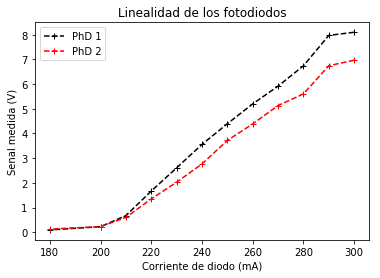

In [33]:
# Datos experimentales
Idiodo = [300, 290, 280, 270, 260, 250, 240, 230, 220, 210, 200, 180]
P1 = [8.099, 7.971, 6.739, 5.917, 5.198, 4.394, 3.556, 2.608, 1.667, 0.674, 0.225, 0.095]
P2 = [6.967, 6.743, 5.602, 5.129, 4.387, 3.717, 2.766, 2.026, 1.352, 0.599, 0.23, 0.127]
# Representar los datos
plt.figure()                                                                                                                                                                                                                                                                                                                                                                                                                  
plt.plot(Idiodo, P1,'k+--')                                                                                                                                                                                                                                                                                                                                                                                                     
plt.plot(Idiodo, P2,'r+--')
plt.xlabel('Corriente de diodo (mA)')
plt.ylabel('Senal medida (V)')
plt.title('Linealidad de los fotodiodos')
plt.legend(('PhD 1', 'PhD 2'))


  # Paso 1: Nivel de 0 de los fotodiodos
 
Guardar el nivel de cero con la fuente apagada en las condiciones en que se va a realizar el experimento.

In [12]:
# Apagar diodo
intensity_0 = get_two_intensities(AIN_signal, AIN_ref, u=u3, d=d, verbose=True)

-0.0243, 0.0115, 

## Paso 2: Colocar P0

Se coloca P0 y se rota hasta generar la mayor señal de intensidad posible. Puesto que esta rotación se hace a mano, la señal se mide en el osciloscopio.


## Paso 3: Medir ratio entre señal y referencia

Retiramos P2 y se guarda la medida de ambos fotodiodos durante un tiempo. Más tarde, se promedian dichos datos para tener la referencia absoluta.

In [13]:
# I = 280 mA
# V = 2.26 V
Naverage = 240
Twait = 1
Iindividual = np.zeros([Naverage,2])
for ind in range(Naverage):
    Iindividual[ind,:] = get_two_intensities(AIN_signal, AIN_ref, u=u3, d=d, verbose=True)-intensity_0
    time.sleep(Twait)

4.3659, 4.8674, 4.3403, 4.8674, 4.3352, 4.8674, 4.3403, 4.8674, 4.3352, 4.8674, 4.3301, 4.8622, 4.3352, 4.8725, 4.3352, 4.8674, 4.3352, 4.8622, 4.3352, 4.8674, 4.3352, 4.8674, 4.3352, 4.8725, 4.3352, 4.8674, 4.3403, 4.8725, 4.3352, 4.8674, 4.3403, 4.8725, 4.3352, 4.8725, 4.3352, 4.8674, 4.3352, 4.8674, 4.3301, 4.8674, 4.3352, 4.8674, 4.3352, 4.8674, 4.3352, 4.8674, 4.3352, 4.8674, 4.3352, 4.8674, 4.3352, 4.8622, 4.3352, 4.8674, 4.3352, 4.8674, 4.3352, 4.8622, 4.3352, 4.8827, 4.3352, 4.8981, 4.3352, 4.8981, 4.3301, 4.8981, 4.3352, 4.8929, 4.3352, 4.8878, 4.3403, 4.8929, 4.3352, 4.8981, 4.3403, 4.8929, 4.3352, 4.8929, 4.3352, 4.8929, 4.3301, 4.8929, 4.3352, 4.8878, 4.3352, 4.8929, 4.3352, 4.8878, 4.3352, 4.8878, 4.3301, 4.8878, 4.3352, 4.8878, 4.3352, 4.8827, 4.3352, 4.8827, 4.3403, 4.8827, 4.3403, 4.8776, 4.3403, 4.8776, 4.3403, 4.8827, 4.3352, 4.8827, 4.3403, 4.8776, 4.3403, 4.8827, 4.3403, 4.8827, 4.3403, 4.8776, 4.3403, 4.8827, 4.3403, 4.8776, 4.3352, 4.8827, 4.3403, 4.8827, 4.3403, 


The mean values are: P1 = 4.37251582096; P2 = 4.8780815667;
The errors are: E1 = 0.00994024150713; E2 = 0.01538483532


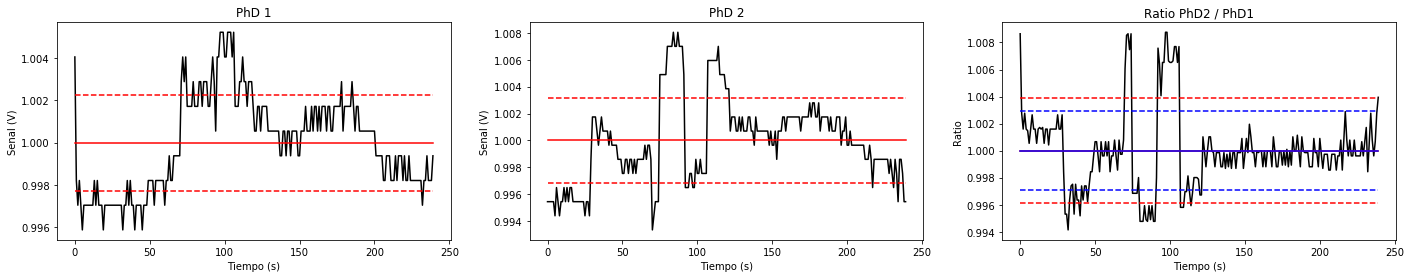

In [14]:
# Make stadistics
ratio_individual = Iindividual[:,0] / Iindividual[:,1]
mean = np.mean(Iindividual, axis=0)
error = np.std(Iindividual, axis=0)
ratio1 = mean[0] / mean[1]
ratio_error1 = ratio1 * sqrt((error[0]/mean[0])**2 + (error[1]/mean[1])**2)
ratio2 = np.mean(ratio_individual)
ratio_error2 = np.std(ratio_individual)
# Print result
print('\nThe mean values are: P1 = {}; P2 = {};'.format(mean[0], mean[1]))
print('The errors are: E1 = {}; E2 = {}'.format(error[0], error[1]))

# Fake plot data
t = range(Naverage)
meanCh1y = np.ones(Naverage)*mean[0]
meanCh1yUp = np.ones(Naverage)*(mean[0]+error[0])
meanCh1yDown = np.ones(Naverage)*(mean[0]-error[0])
meanCh2y = np.ones(Naverage)*mean[1]
meanCh2yUp = np.ones(Naverage)*(mean[1]+error[1])
meanCh2yDown = np.ones(Naverage)*(mean[1]-error[1])
meanRy1 = np.ones(Naverage)*ratio1
meanRyUp1 = np.ones(Naverage)*(ratio1+ratio_error1)
meanRyDown1 = np.ones(Naverage)*(ratio1-ratio_error1)
meanRy2 = np.ones(Naverage)*ratio2
meanRyUp2 = np.ones(Naverage)*(ratio2+ratio_error2)
meanRyDown2 = np.ones(Naverage)*(ratio2-ratio_error2)

# Plot it
plt.figure(figsize=(24, 4))       
plt.subplot(1,3,1)
plt.plot(t,Iindividual[:,0]/meanCh1y,'k')
#plt.hold(True)
plt.plot(t, meanCh1y/meanCh1y,'r')
plt.plot(t, meanCh1yUp/meanCh1y,'r--')
plt.plot(t, meanCh1yDown/meanCh1y,'r--')
plt.title('PhD 1')
plt.xlabel('Tiempo (s)')
plt.ylabel('Senal (V)')

plt.subplot(1,3,2)
plt.plot(t,Iindividual[:,1]/meanCh2y,'k')
#plt.hold(True)
plt.plot(t, meanCh2y/meanCh2y,'r')
plt.plot(t, meanCh2yUp/meanCh2y,'r--')
plt.plot(t, meanCh2yDown/meanCh2y,'r--')
plt.title('PhD 2')
plt.xlabel('Tiempo (s)')
plt.ylabel('Senal (V)')

plt.subplot(1,3,3)
plt.plot(t,ratio_individual/meanRy1,'k')
#plt.hold(True)
plt.plot(t, meanRy1/meanRy2,'r')
plt.plot(t, meanRyUp1/meanRy2,'r--')
plt.plot(t, meanRyDown1/meanRy2,'r--')
plt.plot(t, meanRy2/meanRy2,'b')
plt.plot(t, meanRyUp2/meanRy2,'b--')
plt.plot(t, meanRyDown2/meanRy2,'b--')
plt.title('Ratio PhD2 / PhD1')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ratio')

# Rename for the future
ratio_calibration = ratio2 # Creo que no hace falta, pero por si acaso

# Save data
filename="Paso_4_{}".format(datetime.date.today())
np.savez(filename+'.npz', Naverage=Naverage, Twait=Twait, Iindividual=Iindividual, mean=mean, )

## Paso 3: Colocar R0

Se colocan R0 y P1 en la posición 4. Se rota R0 de tal manera que al hacer un bucle en P1 el valor máximo y mínimo estén lo más cercanos posible.

1.9201, 5.1334, 1.9303, 5.1181, 1.9405, 5.1232, 1.9508, 5.1232, 1.9712, 5.1386, 1.9866, 5.1334, 2.0122, 5.1334, 2.0377, 5.1181, 2.0633, 5.1232, 2.0889, 5.1232, 2.1196, 5.1232, 2.1401, 5.1334, 2.1657, 5.1283, 2.1912, 5.1334, 2.2168, 5.1181, 2.2373, 5.1181, 2.2527, 5.1181, 2.2782, 5.1283, 2.2834, 5.1130, 2.2936, 5.1232, 2.2885, 5.1181, 2.2936, 5.1232, 2.2936, 5.1181, 2.2885, 5.1181, 2.2782, 5.1130, 2.2680, 5.1181, 2.2475, 5.1079, 2.2271, 5.1130, 2.2015, 5.0925, 2.1810, 5.1079, 2.1605, 5.0874, 2.1247, 5.1027, 2.1043, 5.0925, 2.0736, 5.0925, 2.0429, 5.0874, 2.0173, 5.0976, 1.9968, 5.0874, 1.9712, 5.0925, 1.9508, 5.0874, 1.9405, 5.0976, 1.9252, 5.0925, 1.9149, 5.1027, 1.9098, 5.0823, 1.9098, 5.0772, 1.9047, 5.0669, 1.9201, 5.0874, 1.9252, 5.0874, 1.9405, 5.0874, 1.9456, 5.0874, 1.9763, 5.0874, 1.9917, 5.0874, 2.0070, 5.0925, 2.0429, 5.0925, 2.0633, 5.0874, 2.0889, 5.0823, 2.1145, 5.0925, 2.1401, 5.0874, 2.1657, 5.0925, 2.1912, 5.0925, 2.2117, 5.0925, 2.2322, 5.0925, 2.2475, 5.0925, 2.2629, 

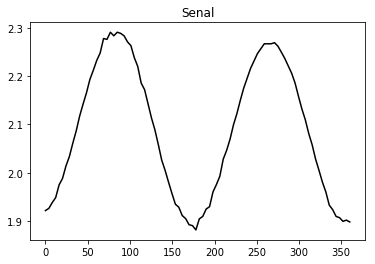

In [34]:
# Data of the experiment
num_data = 90
angle_aux = sp.linspace(0,360,num_data)
intensity1 = np.zeros([num_data,2],dtype=float)
# Make the experiment
for i, angle in enumerate(angle_aux):
    motors.move(
        positions = [0, 0, 0, angle], velocities=Vels, kind='absolute',  verbose=False)
    intensity1[i,:] = get_two_intensities(AIN_signal, AIN_ref, u=u3, d=d, verbose=True)
intensity2 = intensity1[:,0] * intensity1[:,1]/mean[1]

# Plot results, 1D
plt.figure()                                                                                                                                                                                                                                                                                                                                                                                                                  
plt.plot(angle_aux, intensity2,'k')                                                                                                                                                                                                                                                                                                                                                                                                                  
#plt.plot(angle_aux, intensity2/np.mean(intensity2),'k')                                                                                                                                                                                                                                                                                                                                                                                                                  
#plt.plot(angle_aux, intensity1[:,0]/np.mean(intensity1[:,0]),'r')                                                                                                                                                                                                                                                                                                                                                                                                                  
#plt.plot(angle_aux, intensity1[:,1]/np.mean(intensity1[:,1]),'b')
#plt.legend(('Corregido','PhD 1','PhD 2'))
plt.title('Senal')
# Print difference
dif = intensity2.max() - intensity2.min()
print('\nThe difference between max and min signal is: {} V.'.format(dif))

## Paso 5: Medida del origen de angulos

Vamos a usar un polarizador de eje conocido para tomar una referencia absoluta del ángulo de origen de cada elemento. Para ello, colocamos P1 en el motor 4, y colocamos el polarizador de eje conocido en el lugar de la muestra. Entonces, haciendo un bucle con el motor 4, medimos una señal de la que podremos extraer el origen de ángulo de P1 en el motor 4 (además de los p1 y p2 del polarizador de eje conocido).

1.3214, 4.8929, 1.4033, 4.8929, 1.4749, 4.8981, 1.5516, 4.8981, 1.6233, 4.9032, 1.6949, 4.9032, 1.7666, 4.8981, 1.8382, 4.8981, 1.8996, 4.8981, 1.9661, 4.8981, 2.0224, 4.8981, 2.0838, 4.8981, 2.1350, 4.9032, 2.1861, 4.8981, 2.2271, 4.8981, 2.2680, 4.9032, 2.3038, 4.8981, 2.3345, 4.8981, 2.3601, 4.8981, 2.3806, 4.9032, 2.3959, 4.8981, 2.4062, 4.8981, 2.4113, 4.8981, 2.4113, 4.8929, 2.4062, 4.8929, 2.3959, 4.9032, 2.3755, 4.8981, 2.3550, 4.9032, 2.3294, 4.8981, 2.2987, 4.8981, 2.2680, 4.8981, 2.2271, 4.8981, 2.1810, 4.8981, 2.1350, 4.8981, 2.0838, 4.9032, 2.0275, 4.8981, 1.9661, 4.8981, 1.9047, 4.8981, 1.8382, 4.8929, 1.7717, 4.8981, 1.7051, 4.8981, 1.6335, 4.8981, 1.5619, 4.9032, 1.4851, 4.8929, 1.4135, 4.8981, 1.3367, 4.9032, 1.2600, 4.8981, 1.1883, 4.8981, 1.1116, 4.9032, 1.0400, 4.8981, 0.9632, 4.8981, 0.9018, 4.8981, 0.8302, 4.9032, 0.7688, 4.8981, 0.7022, 4.8981, 0.6460, 4.8981, 0.5897, 4.8929, 0.5436, 4.8981, 0.4925, 4.8981, 0.4515, 4.8981, 0.4055, 4.8674, 0.3748, 4.8981, 0.3492, 

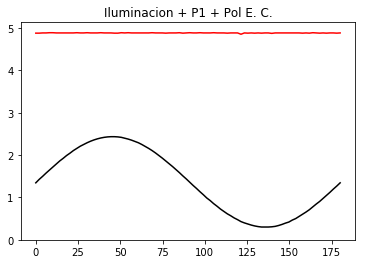

In [15]:
# Make the experiment
intensity1 = np.zeros([num_data_1D,2],dtype=float)
for i, angle in enumerate(angle1):
    motors.move(
        positions = [0, 0, 0, angle], velocities=Vels, kind='absolute',  verbose=False)
    intensity1[i,:] = get_two_intensities(AIN_signal, AIN_ref, u=u3, d=d, verbose=True)
intensity1 = intensity1 - intensity_0
# Save data
filename="Paso_5_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle1=angle1, intensity1=intensity1)
# Plot results, 1D
plt.figure()                                                                                                                                                                                                                                                                                                                                                                                                                  
plt.plot(angle1, intensity1[:,0],'k')
#plt.hold(True)
plt.plot(angle1, intensity1[:,1],'r')
plt.title('Iluminacion + P1 + Pol E. C.')
plt.ylim(0,intensity1.max()*1.05)

# Rename for the future
Intensity_Paso5 = intensity1

## Paso 6: Angulo de origen de R2

Colocamos R2 en el motor 3 y hacemos un bucle moviéndolo sólo a él. De esta manera, podemos calcular su ángulo de origen (porque ya sabemos el de P1).

3.9566, 4.9032, 3.9975, 4.9083, 4.0333, 4.9032, 4.0487, 4.8929, 4.0589, 4.9032, 4.0538, 4.9032, 4.0333, 4.9083, 4.0077, 4.9083, 3.9719, 4.9083, 3.9156, 4.9032, 3.8645, 4.9032, 3.7928, 4.8981, 3.7212, 4.8981, 3.6291, 4.9083, 3.5370, 4.9032, 3.4295, 4.9032, 3.3272, 4.8981, 3.2146, 4.9032, 3.0918, 4.9083, 2.9690, 4.8981, 2.8462, 4.8929, 2.7234, 4.8981, 2.5852, 4.9032, 2.4573, 4.9032, 2.3243, 4.8981, 2.1912, 4.9032, 2.0531, 4.9032, 1.9201, 4.8981, 1.7921, 4.9032, 1.6591, 4.9134, 1.5363, 4.8981, 1.3981, 4.8981, 1.2805, 4.9083, 1.1628, 4.9083, 1.0451, 4.9032, 0.9325, 4.9032, 0.8302, 4.9032, 0.7278, 4.9032, 0.6357, 4.9083, 0.5487, 4.9083, 0.4669, 4.9032, 0.3799, 4.9032, 0.3134, 4.9083, 0.2520, 4.9032, 0.2008, 4.9032, 0.1496, 4.9032, 0.1087, 4.9032, 0.0678, 4.9032, 0.0524, 4.9083, 0.0319, 4.9083, 0.0268, 4.8981, 0.0319, 4.8981, 0.0422, 4.9032, 0.0575, 4.9083, 0.0882, 4.9032, 0.1240, 4.9032, 0.1752, 4.9083, 0.2315, 4.9032, 0.2929, 4.8981, 0.3645, 4.9032, 0.4566, 4.9134, 0.5436, 4.9032, 0.6460, 

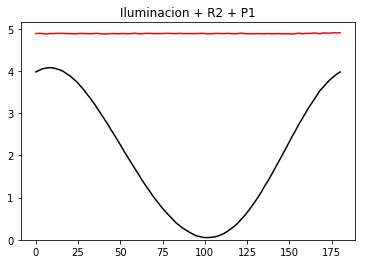

In [16]:
# Make the experiment
for i, angle in enumerate(angle1):
    motors.move(
        positions = [0, 0, angle, 0], velocities=Vels, kind='absolute',  verbose=False)
    intensity1[i,:] = get_two_intensities(AIN_signal, AIN_ref, u=u3, d=d, verbose=True)
intensity1 = intensity1 - intensity_0
# Save data
filename="Paso_6_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle1=angle1, intensity1=intensity1)
# Plot results, 1D
plt.figure()
plt.plot(angle1, intensity1[:,0],'k')
plt.plot(angle1, intensity1[:,1],'r')
plt.title('Iluminacion + R2 + P1')
plt.ylim(0,intensity1.max()*1.05)

# Rename for the future
Intensity_Paso6 = intensity1

## Paso 7: Analizar la fuente

Ahora vamos a hacer un doble bucle con R2 y P1, que conforman un analizador de estados. De esta manera, podremos ajustar los parámetros de la fuente de iluminación, suponiendo conocidos los elementos ópticos del analizador. Aún no los conocemos, pero más adelante los caracterizaremos, y usaremos estos datos para medir la fuente.



3.9617, 4.9185, 3.4653, 4.9236, 2.6415, 4.9032, 1.7000, 4.9083, 0.8404, 4.8981, 0.2622, 4.9083, 0.0985, 4.9236, 0.3799, 4.9288, 1.0451, 4.9185, 1.9456, 4.9032, 2.8769, 4.9134, 3.6291, 4.9083, 4.0180, 4.9083, 3.9566, 4.9032, 

4.0282, 4.9185, 3.9566, 4.9185, 3.4602, 4.9134, 2.6415, 4.9185, 1.6898, 4.9134, 0.8353, 4.9083, 0.2571, 4.9236, 0.0831, 4.9185, 0.3645, 4.9185, 1.0348, 4.9134, 1.9405, 4.9185, 2.8820, 4.9236, 3.6342, 4.9288, 4.0282, 4.9083, 

3.6547, 4.8827, 4.0333, 4.9083, 3.9566, 4.9083, 3.4346, 4.9032, 2.6057, 4.9083, 1.6642, 4.9134, 0.7995, 4.9083, 0.2264, 4.9134, 0.0626, 4.9032, 0.3645, 4.9032, 1.0451, 4.9185, 1.9661, 4.9032, 2.9025, 4.8981, 3.6547, 4.8827, 

2.9639, 4.8827, 3.6803, 4.8827, 4.0333, 4.8776, 3.9207, 4.8827, 3.3835, 4.8776, 2.5494, 4.8776, 1.5926, 4.8827, 0.7381, 4.8776, 0.1854, 4.8776, 0.0524, 4.8776, 0.3799, 4.8725, 1.0911, 4.8674, 2.0224, 4.8725, 2.9639, 4.8776, 

2.1350, 4.8929, 3.0560, 4.8776, 3.7519, 4.8827, 4.0589, 4.8878, 3.8952, 4.8827, 3.3118, 4.8827

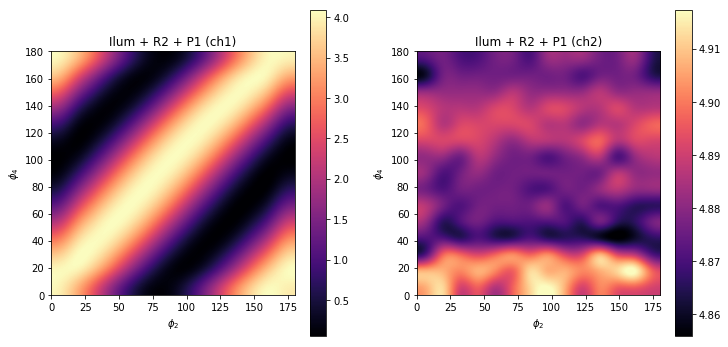

In [17]:
# Make the experiment
for ind1, angleDim1 in enumerate(angles2x):
    print("\n")
    for ind2, angleDim2 in enumerate(angles2y):
        motors.move(
            positions = [0, 0, angleDim1, angleDim2], velocities=Vels, kind='absolute',  verbose=False)
        intensities_2[ind1, ind2, :] = get_two_intensities(AIN_signal, AIN_ref, u=u3, d=d, verbose=True)
intensity2 = intensities_2 - intensity_0
# Save data
filename="Paso_7_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle2x=angles2x, angle2y=angles2y, intensity2=intensity2)

# Plot results, 2D
plt.figure(figsize=(12, 6))   
plt.subplot(1,2,1)
plot_2d(angles2x, angles2y, intensity2[:,:,0], title='Ilum + R2 + P1 (ch1)', xy_are_angles=False)
plt.subplot(1,2,2)
plot_2d(angles2x, angles2y, intensity2[:,:,1], title='Ilum + R2 + P1 (ch2)', xy_are_angles=False)

# Rename for the future
Intensity_Paso7 = intensity2

##  Paso 8: Calibrar polarizadores

En este paso vamos a calibrar los parámetros p1 y p2 de tres polarizadores, haciendo la Ley de Malus de dos en dos. De esta manera, podemos medir los parámetros de cada polarizador individualmente, lo que aumenta nuestra precisión. De igual manera, nos quedaremos con los orígenes de ángulo de P1 y P2 en sus posiciones definitivas.

Lamentablemente, este paso no nos permite medir dos cosas: el retardo que introducen los polarizadores (se tiene que hacer más adelante, solo para P1), ni la elipticidad de sus autoestados de polarización.

**Paso 8a**

P3 (motor 1) y P1 (motor 4).

0.2878, 4.8776, 0.3390, 4.8776, 0.3901, 4.8520, 0.4413, 4.8725, 0.5027, 4.8725, 0.5539, 4.8827, 0.6153, 4.8520, 0.6715, 4.8725, 0.7278, 4.8827, 0.7943, 4.8827, 0.8506, 4.8776, 0.9172, 4.8725, 0.9683, 4.8827, 1.0246, 4.8776, 1.0860, 4.8725, 1.1423, 4.8929, 1.1986, 4.8725, 1.2549, 4.8981, 1.3009, 4.8725, 1.3572, 4.8776, 1.4084, 4.8776, 1.4544, 4.8827, 1.5005, 4.8827, 1.5414, 4.8776, 1.5823, 4.8776, 1.6182, 4.8674, 1.6489, 4.8725, 1.6898, 4.8725, 1.7103, 4.8725, 1.7410, 4.8878, 1.7666, 4.8776, 1.7819, 4.8725, 1.8024, 4.8776, 1.8126, 4.8776, 1.8177, 4.8981, 1.8228, 4.8776, 1.8228, 4.8827, 1.8177, 4.8827, 1.8075, 4.8674, 1.7973, 4.8725, 1.7819, 4.8776, 1.7614, 4.8520, 1.7358, 4.8776, 1.7051, 4.8878, 1.6693, 4.8827, 1.6233, 4.8725, 1.5823, 4.8776, 1.5363, 4.8827, 1.4902, 4.8827, 1.4391, 4.8776, 1.3777, 4.8725, 1.3214, 4.8827, 1.2549, 4.8827, 1.1935, 4.8776, 1.1269, 4.8776, 1.0604, 4.8878, 0.9888, 4.8827, 0.9172, 4.8827, 0.8506, 4.8878, 0.7790, 4.8878, 0.7074, 4.8827, 0.6357, 4.8776, 0.5692, 

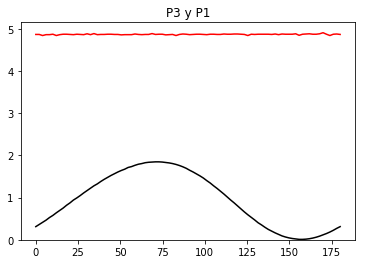

In [18]:
# Make the experiment
for i, angle in enumerate(angle1):
    motors.move(
        positions = [angle, 0, 0, 0], velocities=Vels, kind='absolute',  verbose=False)
    intensity1[i,:] = get_two_intensities(AIN_signal, AIN_ref, u=u3, d=d, verbose=True)
intensity1 = intensity1 - intensity_0
# Save data
filename="Paso_8a_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle1=angle1, intensity1=intensity1)
# Plot results, 1D
plt.figure()
plt.plot(angle1, intensity1[:,0],'k')
plt.plot(angle1, intensity1[:,1],'r')
plt.title('P3 y P1')
plt.ylim(0,intensity1.max()*1.05)

# Rename for the future
Intensity_Paso8a = intensity1


**Paso 8b**

P3 (motor 1) and P2 (motor 4).

1.3316, 4.8571, 1.3981, 4.8622, 1.4544, 4.8571, 1.5158, 4.8571, 1.5670, 4.8520, 1.6233, 4.8469, 1.6744, 4.8571, 1.7154, 4.8571, 1.7614, 4.8571, 1.7973, 4.8622, 1.8331, 4.8520, 1.8587, 4.8520, 1.8791, 4.8571, 1.9098, 4.8622, 1.9201, 4.8571, 1.9354, 4.8520, 1.9354, 4.8520, 1.9354, 4.8622, 1.9303, 4.8827, 1.9252, 4.8520, 1.9098, 4.8827, 1.8894, 4.8469, 1.8689, 4.8520, 1.8433, 4.8520, 1.8075, 4.8674, 1.7717, 4.8776, 1.7307, 4.8776, 1.6898, 4.8674, 1.6437, 4.8520, 1.5823, 4.8776, 1.5312, 4.8776, 1.4800, 4.8776, 1.4186, 4.8776, 1.3572, 4.8827, 1.2907, 4.8725, 1.2242, 4.8725, 1.1576, 4.8776, 1.0911, 4.8725, 1.0195, 4.8776, 0.9530, 4.8725, 0.8813, 4.8776, 0.8148, 4.8776, 0.7534, 4.8776, 0.6818, 4.8725, 0.6204, 4.8776, 0.5539, 4.8725, 0.4925, 4.8776, 0.4362, 4.8827, 0.3748, 4.8776, 0.3236, 4.8776, 0.2775, 4.8827, 0.2264, 4.8827, 0.1854, 4.8776, 0.1445, 4.8776, 0.1138, 4.8725, 0.0780, 4.8776, 0.0473, 4.8827, 0.0268, 4.8776, 0.0115, 4.8776, -0.0039, 4.8725, -0.0141, 4.8776, -0.0141, 4.8776, -0.01

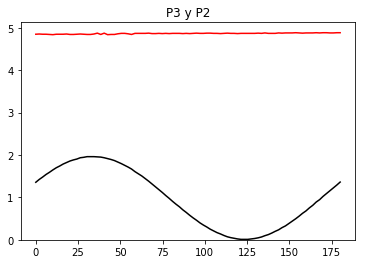

In [19]:
# Make the experiment
for i, angle in enumerate(angle1):
    motors.move(
        positions = [0, 0, 0, angle], velocities=Vels, kind='absolute',  verbose=False)
    intensity1[i,:] = get_two_intensities(AIN_signal, AIN_ref, u=u3, d=d, verbose=True)
intensity1 = intensity1 - intensity_0
# Save data
filename="Paso_8b_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle1=angle1, intensity1=intensity1)
# Plot results, 1D
plt.figure()
plt.plot(angle1, intensity1[:,0],'k')
plt.plot(angle1, intensity1[:,1],'r')
plt.title('P3 y P2')
plt.ylim(0,intensity1.max()*1.05)

# Rename for the future
Intensity_Paso8b = intensity1

**Paso 8c**

P1 and P2 (posiciones definitivas).

1.1423, 4.8418, 1.2190, 4.8929, 1.3009, 4.8878, 1.3726, 4.8674, 1.4544, 4.9236, 1.5261, 4.8878, 1.5926, 4.8622, 1.6693, 4.8929, 1.7307, 4.9083, 1.7870, 4.8725, 1.8484, 4.8674, 1.9047, 4.8827, 1.9456, 4.8827, 1.9917, 4.8725, 2.0326, 4.8622, 2.0633, 4.9032, 2.0889, 4.8827, 2.1043, 4.8929, 2.1145, 4.8776, 2.1247, 4.8878, 2.1298, 4.8827, 2.1196, 4.8776, 2.1094, 4.8674, 2.0991, 4.8622, 2.0787, 4.8827, 2.0377, 4.8725, 2.0070, 4.8622, 1.9661, 4.8622, 1.9252, 4.8674, 1.8740, 4.8315, 1.8177, 4.8571, 1.7614, 4.8725, 1.7000, 4.8571, 1.6386, 4.8674, 1.5721, 4.8827, 1.5005, 4.8776, 1.4340, 4.8622, 1.3623, 4.8571, 1.2856, 4.8622, 1.2139, 4.8622, 1.1372, 4.8622, 1.0655, 4.8571, 0.9888, 4.8622, 0.9172, 4.8622, 0.8506, 4.8367, 0.7790, 4.8725, 0.7074, 4.8776, 0.6408, 4.8571, 0.5743, 4.8469, 0.5129, 4.8315, 0.4566, 4.8622, 0.3952, 4.8725, 0.3441, 4.8674, 0.2929, 4.8622, 0.2468, 4.8622, 0.2008, 4.8674, 0.1650, 4.8469, 0.1292, 4.8520, 0.0985, 4.8418, 0.0729, 4.8674, 0.0371, 4.8776, 0.0268, 4.8469, 0.0115, 

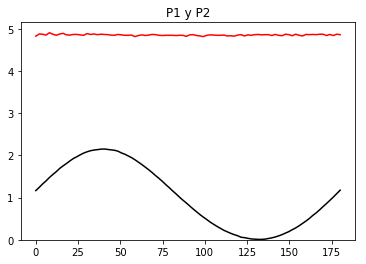

In [20]:
# Make the experiment
for i, angle in enumerate(angle1):
    motors.move(
        positions = [angle, 0, 0, 0], velocities=Vels, kind='absolute',  verbose=False)
    intensity1[i,:] = get_two_intensities(AIN_signal, AIN_ref, u=u3, d=d, verbose=True)
intensity1 = intensity1 - intensity_0
# Save data
filename="Paso_8c_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle1=angle1, intensity1=intensity1)
# Plot results, 1D                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
plt.figure()
plt.plot(angle1, intensity1[:,0],'k')
plt.plot(angle1, intensity1[:,1],'r')
plt.title('P1 y P2')
plt.ylim(0,intensity1.max()*1.05)

# Rename for the future
Intensity_Paso8c = intensity1

## Paso 9: Calibracion del retardador 2

Aquí vamos a calibrar los parámetros p1, p2 y desfase del retardador R2, y el desfase de P1, usando el resto de parámetros medidos para los polarizadores. Para ello, haremos un doble bucle con P1 y P2.



0.6511, 4.8929, 0.5027, 4.8929, 0.4771, 4.8981, 0.5794, 4.8981, 0.7841, 4.8981, 1.0502, 4.8929, 1.3060, 4.8981, 1.5056, 4.8981, 1.5926, 4.8981, 1.5568, 4.8929, 1.3930, 4.8929, 1.1576, 4.8929, 0.8865, 4.8929, 0.6511, 4.8929, 

1.0195, 4.8520, 0.9530, 4.8418, 0.9018, 4.8520, 0.9018, 4.8469, 0.9376, 4.8469, 0.9990, 4.8469, 1.0758, 4.8469, 1.1525, 4.8469, 1.2139, 4.8469, 1.2395, 4.8418, 1.2190, 4.8469, 1.1781, 4.8469, 1.1065, 4.8469, 1.0297, 4.8469, 

1.3879, 4.8418, 1.4186, 4.8469, 1.3726, 4.8469, 1.2600, 4.8520, 1.1065, 4.8520, 0.9427, 4.8520, 0.8148, 4.8520, 0.7432, 4.8520, 0.7534, 4.8520, 0.8353, 4.8418, 0.9734, 4.8418, 1.1372, 4.8622, 1.2856, 4.8622, 1.3930, 4.8725, 

1.6693, 4.8674, 1.8024, 4.8674, 1.7666, 4.8725, 1.5670, 4.8674, 1.2600, 4.8674, 0.9018, 4.8674, 0.5897, 4.8674, 0.3901, 4.8674, 0.3390, 4.8674, 0.4618, 4.8674, 0.7227, 4.8674, 1.0604, 4.8776, 1.4084, 4.8776, 1.6693, 4.8725, 

1.7768, 4.8827, 1.9763, 4.8878, 1.9712, 4.8878, 1.7461, 4.8878, 1.3521, 4.8776, 0.8865, 4.8622

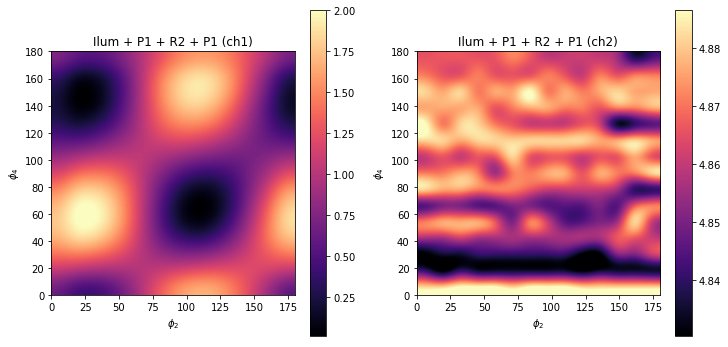

In [21]:
# Hacer el experimento
for ind1, angleDim1 in enumerate(angles2x):
    print("\n")
    for ind2, angleDim2 in enumerate(angles2y):
        motors.move(
            positions = [angleDim1, 0, 0, angleDim2], velocities=Vels, kind='absolute',  verbose=False)
        intensities_2[ind1, ind2, :] = get_two_intensities(AIN_signal, AIN_ref, u=u3, d=d, verbose=True)
intensity2 = intensities_2 - intensity_0
# Save data
filename="Paso_9_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle2x=angles2x, angle2y=angles2y, intensity2=intensity2)

# Plot results, 2D
plt.figure(figsize=(12, 6))   
plt.subplot(1,2,1)
plot_2d(angles2x, angles2y, intensity2[:,:,0], title='Ilum + P1 + R2 + P1 (ch1)', xy_are_angles=False)
plt.subplot(1,2,2)
plot_2d(angles2x, angles2y, intensity2[:,:,1], title='Ilum + P1 + R2 + P1 (ch2)', xy_are_angles=False)

# Rename for the future
Intensity_Paso9 = intensity2


## Paso 10: En desuso

Antes, en este paso, hacíamos un ajuste de los elementos ya medidos. Pero al carecer de un experimento independiente de control, hago todos los experimentos primero, y después todos los ajustes.

## Paso 11: Calibracion retardador 1

Ahora, colocamos R1 y lo caracterizamos, pues ya tenemos los parámetros de todos los demás elementos ópticos del polarímetro.

**Paso 11a: Polarizadores paralelos**



0.7534, 4.8776, 1.0297, 4.8776, 1.4186, 4.8827, 1.5772, 4.8776, 1.3419, 4.8776, 0.8148, 4.8674, 0.3390, 4.8674, 0.2110, 4.8725, 0.4618, 4.8725, 0.8251, 4.8674, 1.0195, 4.8674, 0.9325, 4.8674, 0.7585, 4.8674, 0.7534, 4.8674, 

0.6920, 4.8520, 0.7176, 4.8571, 1.0553, 4.8520, 1.4084, 4.8571, 1.4595, 4.8520, 1.1781, 4.8520, 0.8046, 4.8571, 0.6818, 4.8571, 0.9223, 4.8622, 1.3316, 4.8571, 1.5670, 4.8571, 1.4084, 4.8520, 1.0093, 4.8469, 0.6869, 4.8520, 

0.7074, 4.8674, 0.4822, 4.8674, 0.6715, 4.8725, 1.0809, 4.8725, 1.4033, 4.8725, 1.4544, 4.8725, 1.3163, 4.8725, 1.2446, 4.8776, 1.4084, 4.8776, 1.7205, 4.8776, 1.9047, 4.8827, 1.7307, 4.8929, 1.2344, 4.8929, 0.7074, 4.8878, 

0.6562, 4.8827, 0.2878, 4.8571, 0.3134, 4.8776, 0.6664, 4.8674, 1.1167, 4.8622, 1.4544, 4.8622, 1.6182, 4.8622, 1.6898, 4.8622, 1.8024, 4.8674, 1.9456, 4.8725, 1.9763, 4.8622, 1.7358, 4.8622, 1.2293, 4.8674, 0.6562, 4.8725, 

0.4464, 4.8674, 0.1240, 4.8674, 0.0626, 4.8674, 0.2929, 4.8622, 0.7022, 4.8520, 1.1423, 4.8520

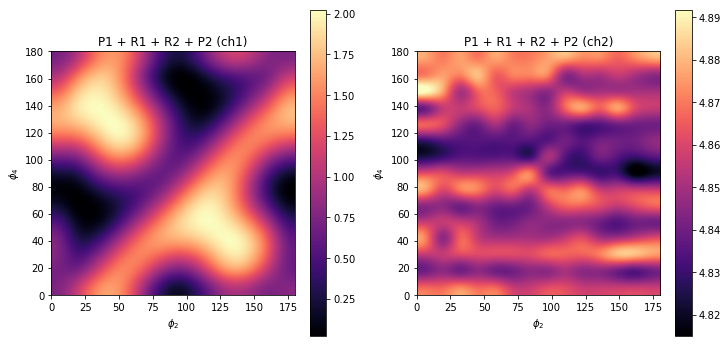

In [23]:
# Hacer el experimento
for ind1, angleDim1 in enumerate(angles2x):
    print("\n")
    for ind2, angleDim2 in enumerate(angles2y):
        pos = [0, angleDim1, angleDim2, 0]
        motors.move(
            positions = pos, velocities=Vels, kind='absolute',  verbose=False)
        intensities_2[ind1, ind2, :] = get_two_intensities(AIN_signal, AIN_ref, u=u3, d=d, verbose=True)
intensity2 = intensities_2 - intensity_0
# Save data
filename="Paso_11a_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle2x=angles2x, angle2y=angles2y, intensity2=intensity2)
# Plot results, 2D
plt.figure(figsize=(12, 6))   
plt.subplot(1,2,1)
plot_2d(angles2x, angles2y, intensity2[:,:,0], title='P1 + R1 + R2 + P2 (ch1)', xy_are_angles=False)
plt.subplot(1,2,2)
plot_2d(angles2x, angles2y, intensity2[:,:,1], title='P1 + R1 + R2 + P2 (ch2)', xy_are_angles=False)

# Rename for the future
Intensity_Paso11a = intensity2


**Paso 11b: Polarizadores cruzados (Experimento de validacion)**

Ahora repetimos el experimento con los polarizadores cruzados, y empleando los mismos parametros, deberiamos poder obtener un buen ajuste (con un solo parametro global de intensidad, por si acaso).



1.2600, 4.8520, 0.9581, 4.8469, 0.5487, 4.8571, 0.3543, 4.8571, 0.5794, 4.8571, 1.1014, 4.8571, 1.5875, 4.8622, 1.7307, 4.8571, 1.5107, 4.8520, 1.1679, 4.8571, 0.9939, 4.8571, 1.0860, 4.8571, 1.2651, 4.8520, 1.2497, 4.8520, 

1.3367, 4.8571, 1.2907, 4.8571, 0.9274, 4.8571, 0.5539, 4.8571, 0.4822, 4.8571, 0.7432, 4.8520, 1.1167, 4.8571, 1.2497, 4.8571, 1.0297, 4.8571, 0.6460, 4.8571, 0.4464, 4.8571, 0.6153, 4.8622, 1.0246, 4.8571, 1.3367, 4.8622, 

1.3214, 4.8674, 1.5414, 4.8674, 1.3367, 4.8725, 0.8967, 4.8725, 0.5487, 4.8674, 0.4822, 4.8674, 0.6050, 4.8725, 0.6818, 4.8674, 0.5334, 4.8674, 0.2315, 4.8674, 0.0678, 4.8674, 0.2673, 4.8622, 0.7892, 4.8622, 1.3214, 4.8622, 

1.3674, 4.8315, 1.7358, 4.8418, 1.7051, 4.8315, 1.3419, 4.8367, 0.8762, 4.8315, 0.5180, 4.8315, 0.3441, 4.8315, 0.2622, 4.8315, 0.1599, 4.8367, 0.0268, 4.8315, 0.0115, 4.8367, 0.2622, 4.8367, 0.7841, 4.8264, 1.3674, 4.8264, 

1.5516, 4.8315, 1.8842, 4.8418, 1.9354, 4.8264, 1.7051, 4.8520, 1.2958, 4.8469, 0.8455, 4.8418

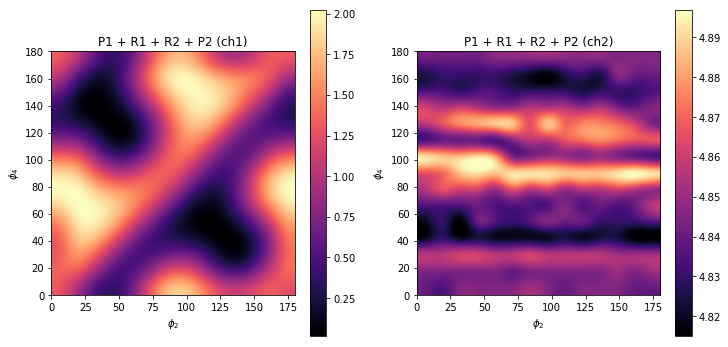

In [24]:
# Hacer el experimento
for ind1, angleDim1 in enumerate(angles2x):
    print("\n")
    for ind2, angleDim2 in enumerate(angles2y):
        pos = [0, angleDim1, angleDim2, 90] 
        motors.move(
            positions = pos, velocities=Vels, kind='absolute',  verbose=False)
        intensities_2[ind1, ind2, :] = get_two_intensities(AIN_signal, AIN_ref, u=u3, d=d, verbose=True)
intensity2 = intensities_2 - intensity_0
# Save data
filename="Paso_11b_{}".format(datetime.date.today())
np.savez(filename+'.npz', angle2x=angles2x, angle2y=angles2y, intensity2=intensity2)
# Plot results, 2D
plt.figure(figsize=(12, 6))   
plt.subplot(1,2,1)
plot_2d(angles2x, angles2y, intensity2[:,:,0], title='P1 + R1 + R2 + P2 (ch1)', xy_are_angles=False)
plt.subplot(1,2,2)
plot_2d(angles2x, angles2y, intensity2[:,:,1], title='P1 + R1 + R2 + P2 (ch2)', xy_are_angles=False)

# Rename for the future
Intensity_Paso11b = intensity2

## Ajuste de datos

Ahora que tenemos todos los experimentos, vamos a realizar el ajuste para determinar los parámetros de los elementos ópticos. Puesto que el código es largo y complejo, lo he separado en un script independiente.

[Error 2] El sistema no puede encontrar el archivo especificado: u'$med_folder'
C:\Users\luismiguel\software\polarimeter\notebooks\calibration\Medidas_2019-02-07
Carga de datos finalizada
Iteracion 0
Error del ultimo paso: 0.000437816632242.
Iteracion 1
Error del ultimo paso: 0.000437816669214.
Iteracion 2
Error del ultimo paso: 0.000437816666365.
Iteracion 3
Error del ultimo paso: 0.000429776522533.
Iteracion 4
Error del ultimo paso: 0.000429562437588.
Iteracion 5
Error del ultimo paso: 0.000517950242389.
Iteracion 6
Error del ultimo paso: 0.000559129615508.
Iteracion 7
Error del ultimo paso: 0.000595517982472.
Iteracion 8
Error del ultimo paso: 0.00062289517841.
Iteracion 9
Error del ultimo paso: 0.000644008625595.
Iteracion 10
Error del ultimo paso: 0.000646974132046.
Iteracion 11
Error del ultimo paso: 0.000648678839812.
Iteracion 12
Error del ultimo paso: 0.000651032486758.
Iteracion 13
Error del ultimo paso: 0.000653667284842.
Iteracion 14
Error del ultimo paso: 0.000656449637682

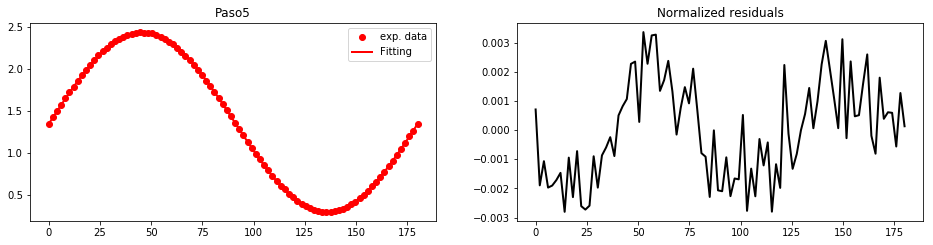

Parametros del paso 6
Th0r2b = 80.986101923 deg; Th0E_az = -1.00623058987 deg; Th0E_el = -0.0335410196046 deg;
Error del paso 6: 0.000542420321603.


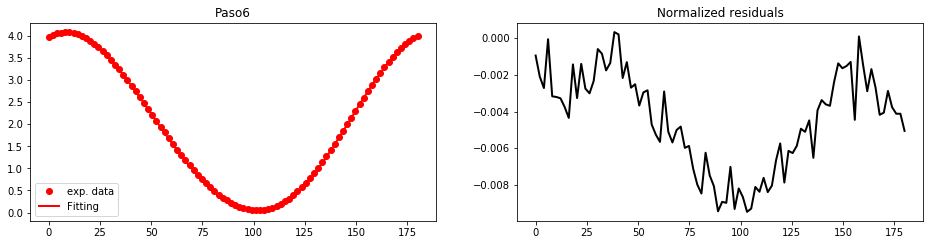

Parametros del paso 7
S0 = 4.28258966001 V; Azimuth = 23.5668146546 deg; Ellipticity = 47.8192903319 deg; Pol. degree = 1.0; Th0_error = -0.155226257954 deg;
Error del paso 7: 0.000507762175847.
Parametros del paso 8
p11 = 0.981060953688; p12 = 0.0514443038342; p21 = 0.975493283775; p22 = 0.048210103394; p31 = 0.979010789534; p32 = 0.0561621811079;
Th0p1 = 173.440233761 deg; Th0p2 = 34.8964450684 deg; Th0p3 = 68.9443590384 deg; Th0E_az = -0.112692682271 deg; Th0E_el = 0.0335410196625 deg;
Error del paso 8: 0.000139250286949.


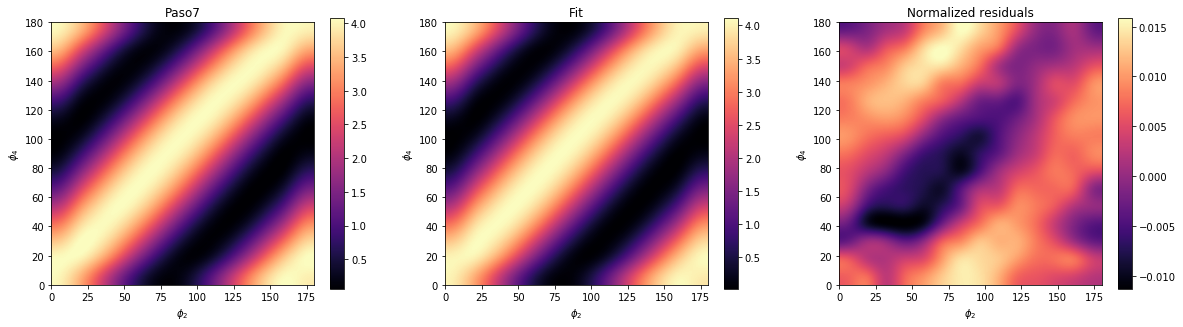

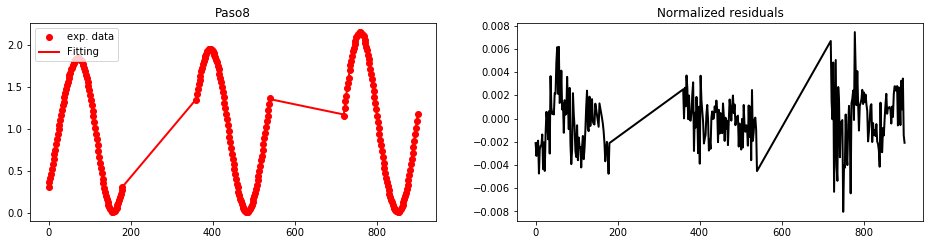

Parametros del paso 9
R2p1 = 0.995476644328; R2p2 = 1.00385811866; Delay_R2 = 82.7605449275; Th0_R2 = 55.4911133638; Delay_p1 = 56.0567412282;
Th0_error = -1.00623058987; Th0E_az = -1.00623058987; Th0E_az = 0.0335410196625;
Error del paso 9: 0.00104260436385.
Parametros del paso 11a
R1p1 = 0.983820656002; R1p2 = 0.988211852408; Delay_R1 = 82.9425129679; Th0_R1 = 162.672244914;
Error del paso 11a: 0.000670157898173.
Error del paso 11b: 0.000708067940237.
La matriz del vacio es:
[[ 0.99873409  0.0003271  -0.00122292  0.        ]
 [-0.0002436   0.98320926 -0.00237347  0.        ]
 [ 0.00124225 -0.00344899  0.98277507  0.        ]
 [-0.          0.          0.          0.99204823]]
Error matriz del vacio: 0.00161074794116.
Error del ultimo paso: 0.000670157898173.
Elapsed time is 721.104999781 s.
Data saved succesfully


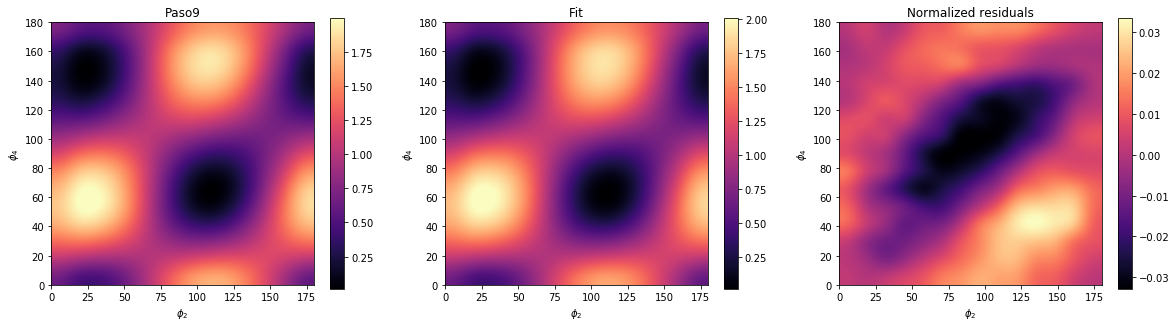

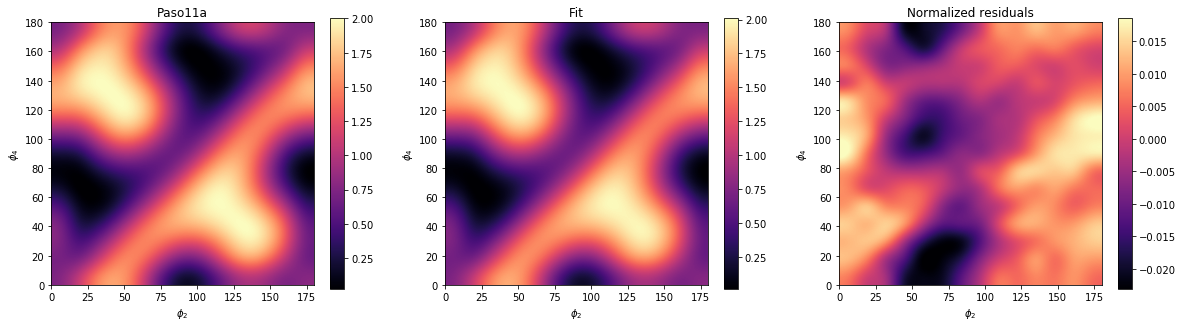

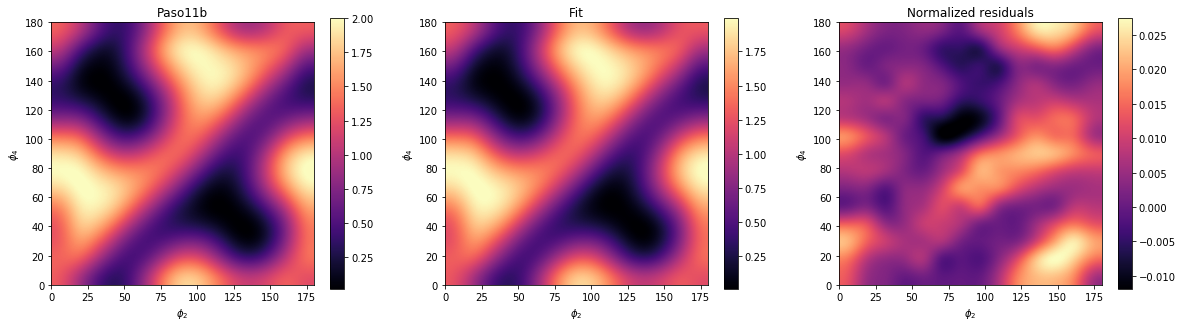

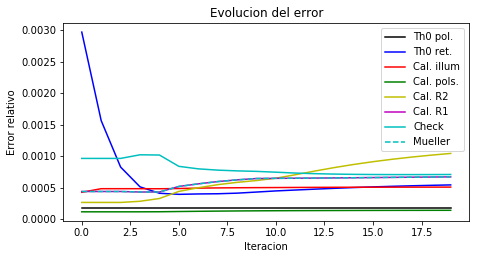

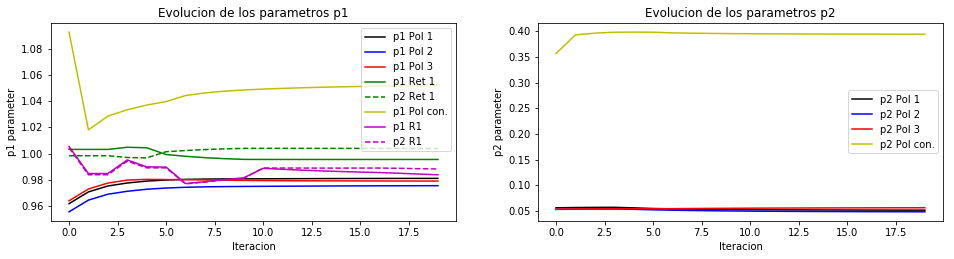

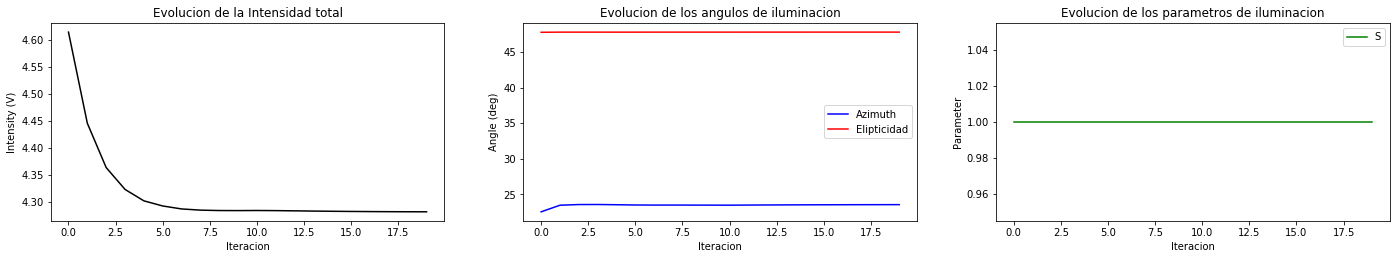

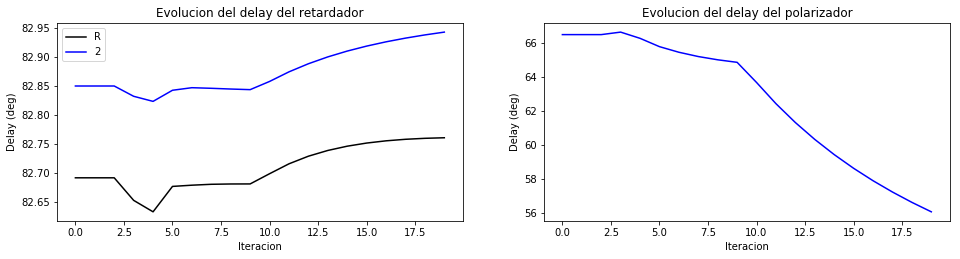

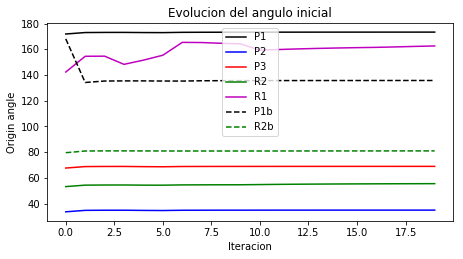

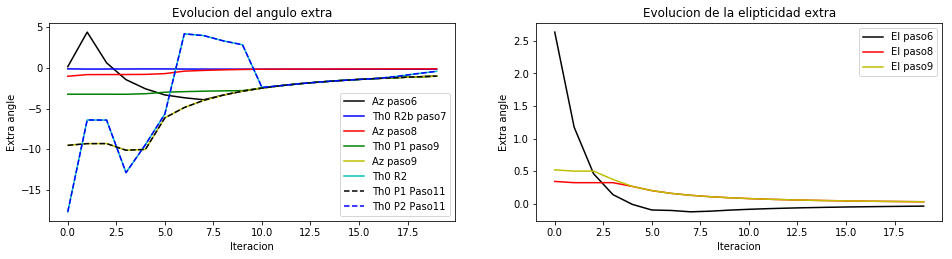

In [31]:
# Parameters of the program
params = {}
params["NmaxIteraciones"] = 20
params["tolerancia"] = 1e-4
params["PlotCadaPaso"] = False
params["ordenarPes"] = True
params["tol_while"] = 2.5e-4
params["N_it_while"] = 10
params["use_random_angles"] = True
params["fix_parameters"] = True
params["hacer_paso_11"] = True
params["save_data"] = True

# Execute
%cd $med_folder
polarimetro = process_calibration(fecha, params)

## Final

Ahora vamos a copiar el script utilizado para realizar el ajuste, y este notebook. IMPORTANTE: Comprueba los nombres de archivo y localizaciones, no pueden guardarse en variables y hay que cambiarlo manualmente ahora. 

In [32]:
# Recordar fecha para nombre de archivos
fecha = datetime.date.today()
print(fecha)

2019-02-07


In [34]:
# Go to script folder
%cd process
# Copy the file
%copy $name_process $path_medidas_new
# Go to notebook folder
%cd medidas
# Copy the file
%copy $name_notebook $path_medidas_new

(bookmark:process) -> C:\Users\luismiguel\software\polarimeter\polarimeter
C:\Users\luismiguel\software\polarimeter\polarimeter
        1 archivo(s) copiado(s).
(bookmark:medidas) -> C:\Users\luismiguel\software\polarimeter\notebooks\calibration
C:\Users\luismiguel\software\polarimeter\notebooks\calibration
        1 archivo(s) copiado(s).


Finalmente, cerrar los motores.

In [36]:
# Cerrar motores
motors.close()
del motors
LabJackPython.Close()

NameError: name 'motors' is not defined